<a href="https://colab.research.google.com/github/Vilash/machineLearning/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
sns.set()

**Dataset:** Aimes Housing

In [13]:
aimes = pd.read_csv("https://assets.datacamp.com/production/repositories/943/datasets/4dbcaee889ef06fb0763e4a8652a4c1f268359b2/ames_housing_trimmed_processed.csv", header='infer')
X_aimes, y_aimes = aimes.iloc[:, :-1], aimes.iloc[:,-1]


**Dataset:** Chronic Kidney Disease

In [70]:
features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'ckd']
kidDis = pd.read_csv("https://assets.datacamp.com/production/repositories/943/datasets/82c231cd41f92325cf33b78aaa360824e6b599b9/chronic_kidney_disease.csv", header=None, na_values='?', names=features)
X_kid, y_kid = kidDis.iloc[:,:-1], LabelEncoder().fit_transform(kidDis.iloc[:,-1])
print(X_kid.head())
print(y_kid[:5])

    age    bp     sg   al   su     bgr  ...  htn   dm cad  appet   pe  ane
0  48.0  80.0  1.020  1.0  0.0     NaN  ...  yes  yes  no   good   no   no
1   7.0  50.0  1.020  4.0  0.0     NaN  ...   no   no  no   good   no   no
2  62.0  80.0  1.010  2.0  3.0  normal  ...   no  yes  no   poor   no  yes
3  48.0  70.0  1.005  4.0  0.0  normal  ...  yes   no  no   poor  yes  yes
4  51.0  80.0  1.010  2.0  0.0  normal  ...   no   no  no   good   no   no

[5 rows x 24 columns]
[0 0 0 0 0]


# **Classification with XGBoost**
---
- Metric for Binary Classification
  - **AUC_ROC_SCORE**
- Metric for Multi Classification
  - **Accuracy** & **Confusion Matrix**
- Numeric features are **scaled** 
- Categorical features **encoded**


---
**XGBoost**
- originally written in C++
- optimized gradient boosting ml-library
- speed and performance
- core algo is parallelizable
- outperforms single-algorithm methods
- state-of-the-art performance in many ML tasks
- it uses CART as **base learners** that store real-valued score in leafs

**Boosting**
- is a ensemble meta-algorithm i.e. it's a concept that can be applied to different ML methods
- it converts weak learners to strong learners


**When should XGBoost be used ?**
- '#' of samples > '#' of features
- Numerical or both numerical + categorical

**When should XGBoost not be used ?**
- Image Recognition
- Computer Vision
- NLP








# **Regression with XGBoost**
---
- **Metrics** : RMSE, MAE
- Linear Regression, Decision Trees
- Objective ***fx*** (loss) for XGBoost
 - reg:linear: regression problems
 - reg:logistic: classification;decision
 - binary:logistic: classification;probability
- individual models = base learners




In [14]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_aimes, y_aimes, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(seed=123, objective="reg:linear", n_estimators=10)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[14:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 78847.401758


**Linear Base Learner**

In [15]:
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

params = {'booster':'gblinear', 'objective':'reg:linear'}
xgb_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

y_pred = xgb_reg.predict(DM_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: {:.3f}".format(rmse))

[14:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 44331.645


**Evaluating Model Quality**
- **RMSE**
- **MAE**



In [16]:
housing_dmatrix = xgb.DMatrix(data=X_aimes, label=y_aimes)

params = {"objective":"reg:linear", "max_depth":4}

cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

print("RMSE: {:.3f}".format((cv_results['test-rmse-mean']).iloc[-1]))

[14:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 51348.276


In [17]:
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

print("MAE: {:.3f}".format((cv_results["test-mae-mean"]).iloc[-1]))

[14:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 35670.655


**Regularization in XGBoost**
- to control model complexity
- gamma: min loss reduction for split to occur
- alpha: l1 reg. 
- lambda: l2 reg.

[14:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


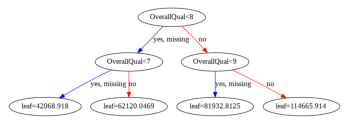

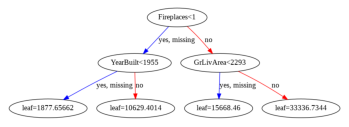

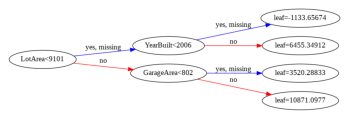

In [18]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X_aimes, label=y_aimes)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")

In [19]:
l1_params = [1, 100, 10000]
rmses_l1=[]

for reg in l1_params:
  params['alpha'] = reg
  cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=10, metrics="rmse", as_pandas=True, seed=123)
  rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])

print("Best rmse as function of l1\n")
print(pd.DataFrame(list(zip(l1_params, rmses_l1)),columns=["l1", "rmse"]))

# xgb.plot_importance()

[14:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[14:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


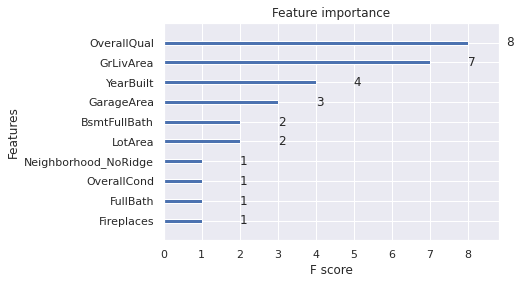

In [20]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X_aimes, label=y_aimes)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# **Fine-tuning your XGBoost model**
---
Tree based learner
- learning rate
- gamma: min loss reduction for tree split
- alpha
- lambda
- max_depth
- subsample: [0,1], % of samples used per tree
- colsample_bytree: [0,1], % of features used per tree
- number of estimators

Linear based learner
- alpha
- lambda
- lambda_bias
- number of estimators


In [21]:
tuned_params = {"objective":"reg:linear", "colsample_bytree":0.3, "learning_rate":0.1, "max_depth":5}

tuned_cv_rmse_results = xgb.cv(params=tuned_params, dtrain=housing_dmatrix, nfold=4, num_boost_round=200,metrics='rmse', as_pandas=True, seed=123)
print("Tuned RMSE: {:.3f}".format((tuned_cv_rmse_results["test-rmse-mean"]).iloc[-1]))

[14:51:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Tuned RMSE: 31111.040


**Tuning Boosting Rounds**

In [22]:
housing_dmatrix = xgb.DMatrix(data=X_aimes, label=y_aimes)

params = {"objective":"reg:linear", "max_depth":5}

num_rounds = [5, 10, 15, 500]

final_rmse_per_round = []

for round in num_rounds:
  cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=round, metrics="rmse", as_pandas=True, seed=123)
  final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

round_rmses = pd.DataFrame(list(zip(num_rounds, final_rmse_per_round)), columns=["boosting rounds", "rmse"])
print(round_rmses)

[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**Early stopping**

In [23]:
housing_dmatrix = xgb.DMatrix(data=X_aimes, label=y_aimes)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, metrics="rmse", seed=123, early_stopping_rounds=10, num_boost_round=50, as_pandas=True, nfold=3)

# Print cv_results
print(cv_results)

[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.630208      403.632409   142640.630208     705.552907
1     103057.033854       73.787612   104907.677083     111.124997
2      75975.958333      253.705643    79262.057292     563.761707
3      57420.515625      521.666323    61620.138021    1087.681933
4      44552.960938      544.168971    50437.558594    1846.450522
5      35763.942708      681.796885    43035.660156    2034.476339
6      29861.469401      769.567549    38600.881511    2169.803563
7      25994.679036      756.524834    36071.816407    2109.801581
8      23306.832

**Tuning learning rate (eta) values**

In [24]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X_aimes, label=y_aimes)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, early_stopping_rounds=5, num_boost_round=10, metrics="rmse", seed=123,as_pandas=True)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))


[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**Tuning max_depth**

In [25]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X_aimes,label=y_aimes)

# Create the parameter dictionary
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, early_stopping_rounds=5, num_boost_round=10, metrics="rmse", seed=123, as_pandas=True)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**Tuning colsample_bytree**

In [26]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X_aimes,label=y_aimes)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**XGBoost with GridSearch**

In [ ]:
gbm = xgb.XGBRegressor()
gbm_param_grid = {'learning_rate': [0.01, 0.1, 0.5, 0.9],
                  'n_estimators': [200],
                  'subsample': [0.3, 0.5, 0.9]
                }


grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,scoring='neg_mean_squared_error', cv=4, verbose=1)

grid_mse.fit(X_aimes, y_aimes)
print("Best Parameters: ", grid_mse.best_params_)
print("Lowest RMSE: ", np.sqrt(abs(grid_mse.best_score_)))


In [ ]:
gbm = xgb.XGBRegressor()
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,scoring='neg_mean_squared_error', cv=4, verbose=1)

grid_mse.fit(X_aimes, y_aimes)
print("Best Parameters: ", grid_mse.best_params_)
print("Lowest RMSE: ", np.sqrt(abs(grid_mse.best_score_)))

**XGBoost with RandomSearch**

In [ ]:
gbm_param_grid = {'learning_rate': np.arange(0.05, 1.05, 0.05),
                  'n_estimators': [200],
                  'subsample': np.arange(0.05, 1.05, 0.05)
                }

rscv_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,scoring='neg_mean_squared_error', cv=4, verbose=1)

rscv_mse.fit(X_aimes, y_aimes)
print("Best Parameters: ", rscv_mse.best_params_)
print("Lowest RMSE: ", np.sqrt(np.abs(rscv_mse.best_score_)))

In [36]:
gbm = xgb.XGBRegressor()
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,scoring='neg_mean_squared_error', cv=4, verbose=1)

grid_mse.fit(X_aimes, y_aimes)
print("Best Parameters: ", grid_mse.best_params_)
print("Lowest RMSE: ", np.sqrt(abs(grid_mse.best_score_)))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.5s finished


# **Using XGBoost in pipelines**


**Case Study 1:** Chronic Kidney Disease 

In [47]:
# Check number of nulls in each feature column
nullsPerColumn = kidDis.isnull().sum()
print(nullsPerColumn)

age        9
bp        12
sg        47
al        46
su        49
bgr      152
bu        65
sc         4
sod        4
pot       44
hemo      19
pcv       17
wc        87
rc        88
rbc       52
pc        71
pcc      106
ba       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
ckd        0
dtype: int64


In [92]:
# Boolean mask for categorical columns
categoricalFeatureMask = X_kid.dtypes == object

# Get Categorical Columns
categorical_features = X_kid.columns[categoricalFeatureMask].tolist()

# Get Numerical Columns
noncategorical_features = X_kid.columns[~categoricalFeatureMask].tolist()

# Apply Numeric Imputer
numericImputationMapper = DataFrameMapper([([numeric_feature], SimpleImputer(strategy="median")) for numeric_feature in noncategorical_features], input_df=True, df_out=True)

# Apply Categorical Imputer
categoricalImputationMapper = DataFrameMapper([(category_feature, CategoricalImputer()) for category_feature in categorical_features], input_df=True, df_out=True)

In [96]:
numericCategoricalUnion = FeatureUnion([("num_mapper", numericImputationMapper), 
                                        ("cat_mapper", categoricalImputationMapper)])
print(pd.DataFrame(numericCategoricalUnion).head())
# dictResult = DictVectorizer(sort=False).fit_transform(numericCategoricalUnion.to_dict("records"))

# xgbc = xgb.XGBClassifier(max_depth=3)
# cross_val_scores = cross_val_score(xgbc, dictResult, y_kid, scoring="roc_auc", cv=3)
# print("3-fold AUC mean:", np.mean(cross_val_scores))
# # def Dictifier(x):
# #   return x.to_dict("records")

ValueError: ignored

In [91]:


pipeline = Pipeline([("featureunion", numericCategoricalUnion),
                      ("dictifier", Dictifier),
                      ("vectorizer", DictVectorizer(sort=False)),
                      ("clf", xgb.XGBClassifier(max_depth=3)) ])

cross_val_scores = cross_val_score(pipeline, X_kid, y_kid, scoring="roc_auc", cv=3)

print("3-fold AUC mean:", np.mean(cross_val_scores))

TypeError: ignored

In [103]:
xgb_pipeline = Pipeline([("scaler", StandardScaler()),
                        ("xgb_model", xgb.XGBRegressor())])

gbm_param_grid = { "xgb_model__subsample": np.arange(0.05, 1, 0.05),
                   "xgb_model__max_depth": np.arange(3,20,1),
                   "xgb_model__colsample_bytree": np.arange(0.1, 1.05, 0.05)
                  }

randomized_neg_mse = RandomizedSearchCV(estimator=xgb_pipeline, param_distributions=gbm_param_grid, n_iter=10, scoring="neg_mean_squared_error", cv=4)
randomized_neg_mse.fit(X_aimes, y_aimes)

print("Best RMSE:", np.sqrt(np.abs(randomized_neg_mse.best_score_)))

[19:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re